## Leren: Programming Assignment 1
#### Wim Berkelmans,
#### Philip Bouman, 10668667


### 1. Read data from file

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg

def loadData(feature):
    data = np.loadtxt('HousesRegr.csv', skiprows = 1, delimiter=';');
    columns = ['MLS','Bedrooms','Bathrooms','Size','Price']
    index = columns.index(feature)
    return data[:,index]

bedroom = loadData('Bedrooms')
bathroom = loadData('Bathrooms')
size = loadData('Size')
price = loadData('Price')

### 2. Cost function

In [38]:
def calcCost(theta_0, theta_1, x, y):
    m = len(x)
    cost_sum = 0
    for i in range(m):
        cost_sum += (theta_1 * x[i] + theta_0 - y[i])**2
    cost = cost_sum / (2.0*m)    
    return cost

### 3. Update parameters (Iterative)

In [39]:
def gradientIter(theta_0, theta_1, x, y, alpha):
    m = len(x)
    sum_theta_0 = 0.0
    sum_theta_1 = 0.0

    for i in range(m):
        sum_theta_0 += theta_1 * x[i] + theta_0 - y[i]
        
        sum_theta_1 += x[i] * (theta_1 * x[i] + theta_0 - y[i])

    new_theta_0 = theta_0 - ((1.0/m)*sum_theta_0 * alpha)
    new_theta_1 = theta_1 - ((1.0/m)*sum_theta_1 * alpha)
    return [new_theta_0, new_theta_1]

### 3. Update parameters (Vectorized)

In [40]:
def regressionVec(x, y):
    m = len(x)
    # create design matrix
    X = np.ones((m, 2))
    for i in range(m):
        X[i, 1] = x[i]
        
    # vectorize predicted output
    Y = y[:, np.newaxis]
    
    # apply normal equation
    norm = np.dot(np.dot(linalg.inv(np.dot(X.T, X)), X.T), Y)
    
    return norm[0][0], norm[1][0]

### 4. Regression Function

In [41]:
def regressionIter(theta_0, theta_1, x, y, alpha, n_iter):   
    while n_iter > 0:
        step = gradientIter(theta_0, theta_1, x, y, alpha) 
        theta_0 = step[0]
        theta_1 = step[1]
        cost = calcCost(theta_0, theta_1, x, y)
        n_iter -= 1
    return step[0], step[1], cost

### 4. Plot Data


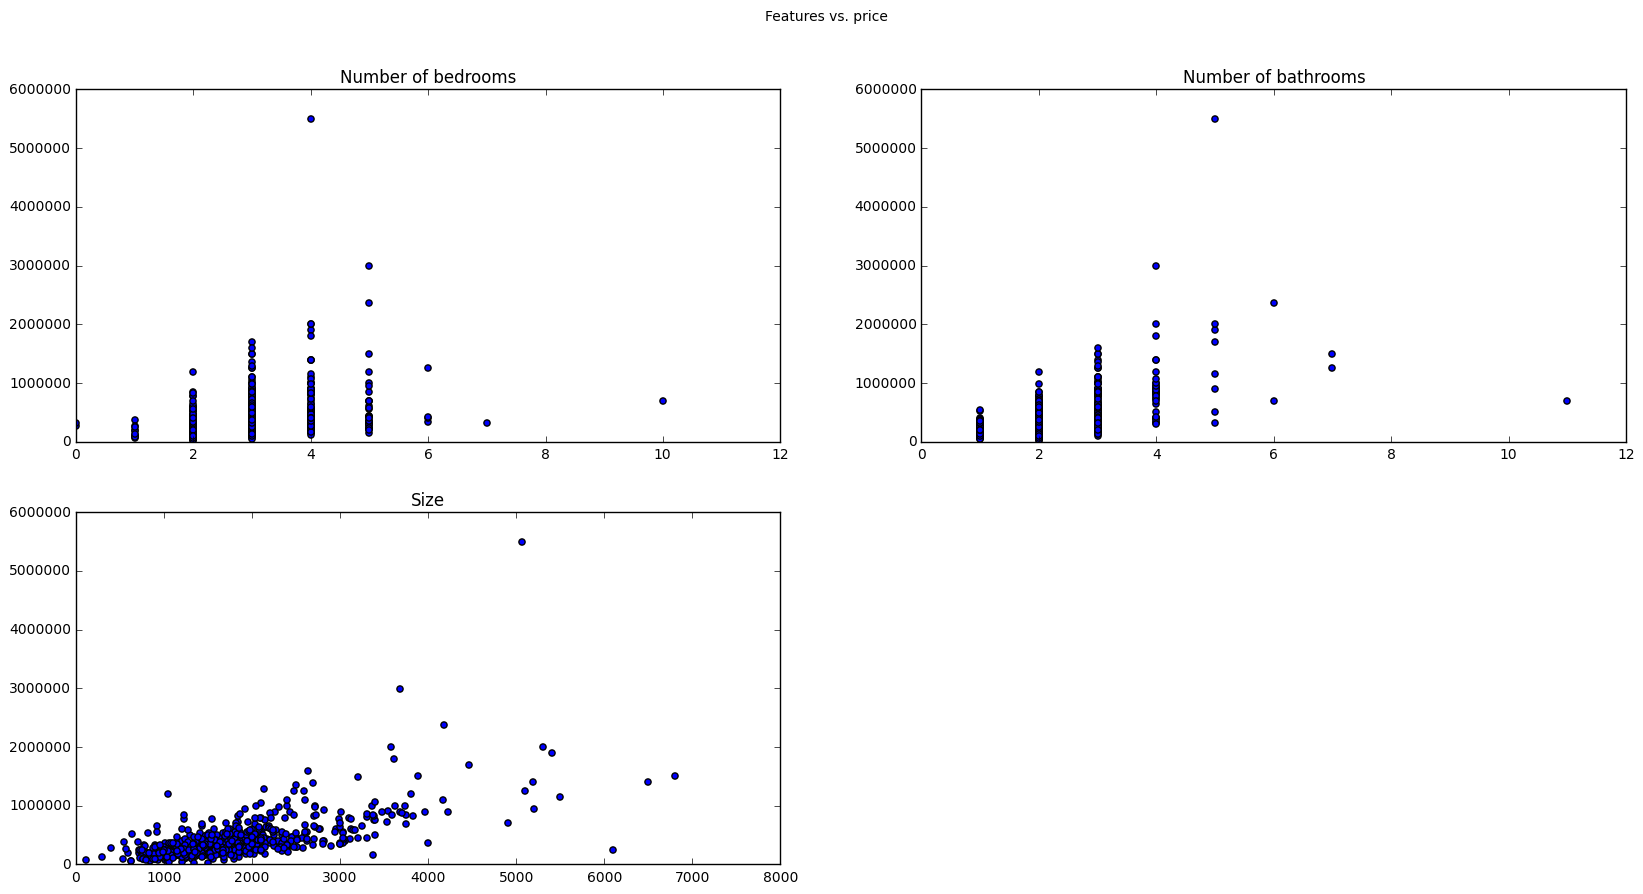

In [42]:
plt.figure(figsize=(20, 10))
plt.suptitle('Features vs. price')

plt.subplot(2,2,1)
plt.scatter(bedroom, price)
plt.title('Number of bedrooms')
plt.axis([0,12,0,6000000])

plt.subplot(2,2,2)
plt.scatter(bathroom, price)
plt.title('Number of bathrooms')
plt.axis([0,12,0,6000000])

plt.subplot(2,2,3)
plt.scatter(size, price)
plt.title('Size')
plt.axis([0,8000,0,6000000])

plt.show()

### 5. Bedrooms

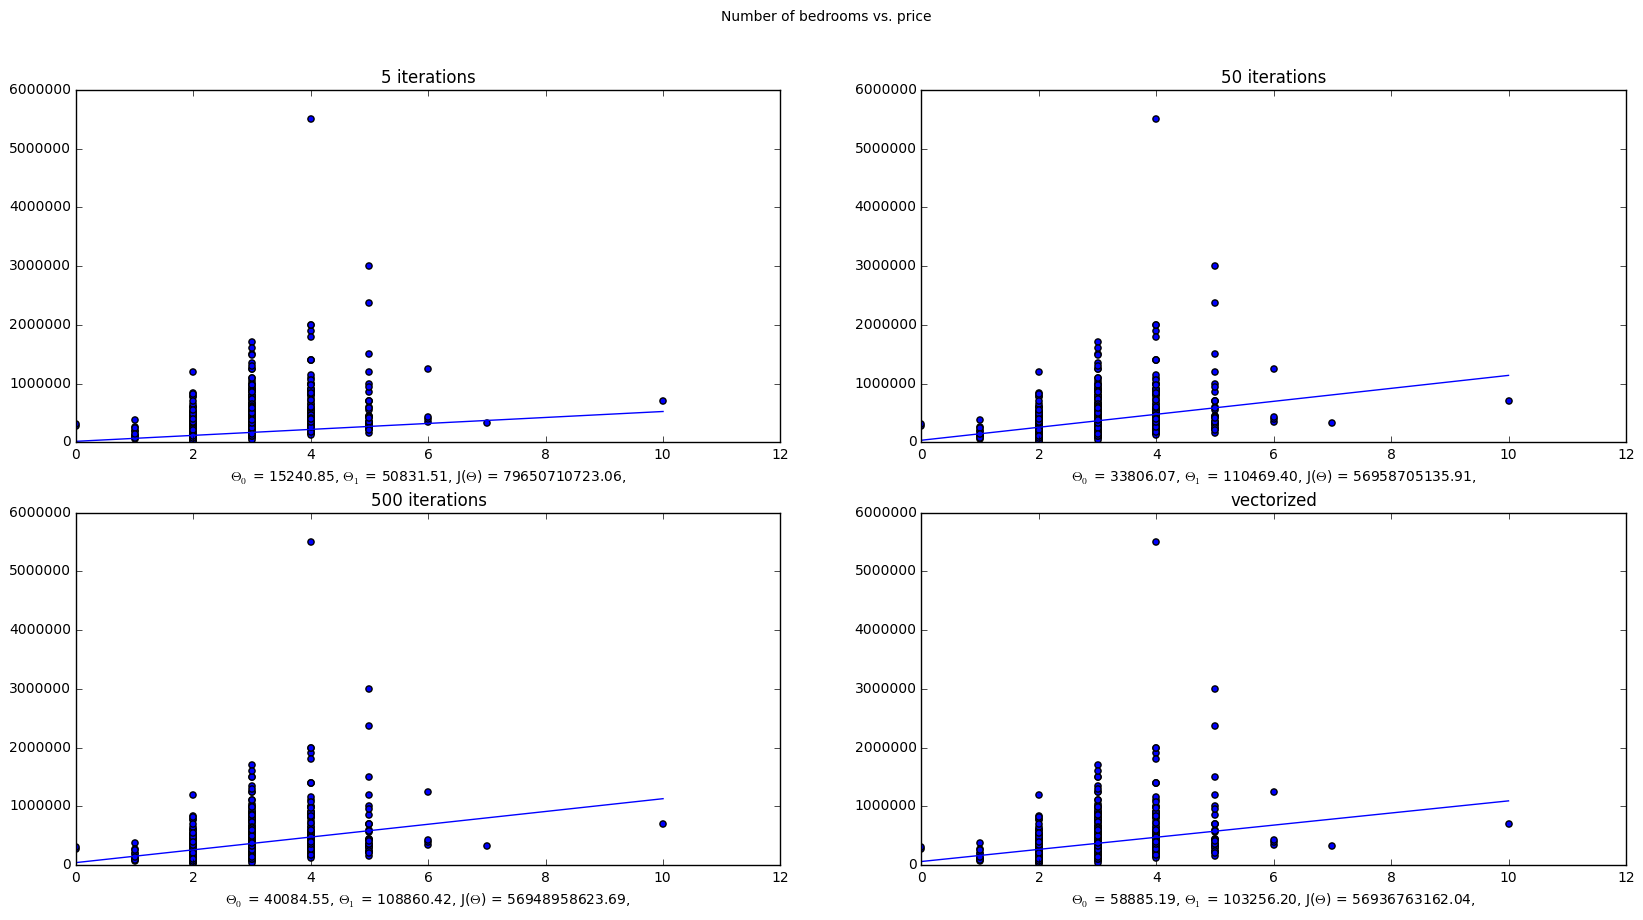

In [43]:
# TODO: choose better values for alpha and number of iterations

iter_1 = regressionIter(0, 1, bedroom, price, 0.01, 5) 
iter_2 = regressionIter(0, 1, bedroom, price, 0.01, 50)
iter_3 = regressionIter(0, 1, bedroom, price, 0.01, 500)

vec = regressionVec(bedroom, price)
vec_cost = calcCost(vec[0], vec[1], bedroom, price)

title_1 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_1[0] , iter_1[1], iter_1[2])
title_2 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_2[0] , iter_2[1], iter_2[2])
title_3 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_3[0] , iter_3[1], iter_3[2])
title_4 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (vec[0] , vec[1], vec_cost)

plt.figure(figsize=(20, 10))
plt.suptitle('Number of bedrooms vs. price')

plt.subplot(2,2,1)
plt.scatter(bedroom, price)
plt.title('5 iterations')
plt.axis([0,12,0,6000000])
plt.xlabel(title_1)
x = np.arange(max(bedroom)+1)
y = iter_1[0] + iter_1[1] * x
plt.plot(x,y)

plt.subplot(2,2,2)
plt.scatter(bedroom, price)
plt.title('50 iterations')
plt.axis([0,12,0,6000000])
plt.xlabel(title_2)
x = np.arange(max(bedroom)+1)
y = iter_2[0] + iter_2[1] * x
plt.plot(x,y)

plt.subplot(2,2,3)
plt.scatter(bedroom, price)
plt.title('500 iterations')
plt.axis([0,12,0,6000000])
plt.xlabel(title_3)
x = np.arange(max(bedroom)+1)
y = iter_3[0] + iter_3[1] * x
plt.plot(x,y)

plt.subplot(2,2,4)
plt.scatter(bedroom, price)
plt.title('vectorized')
plt.axis([0,12,0,6000000])
plt.xlabel(title_4)
x = np.arange(max(bedroom)+1)
y = vec[0] + vec[1] * x
plt.plot(x,y)

plt.show()

### 5. Bathrooms

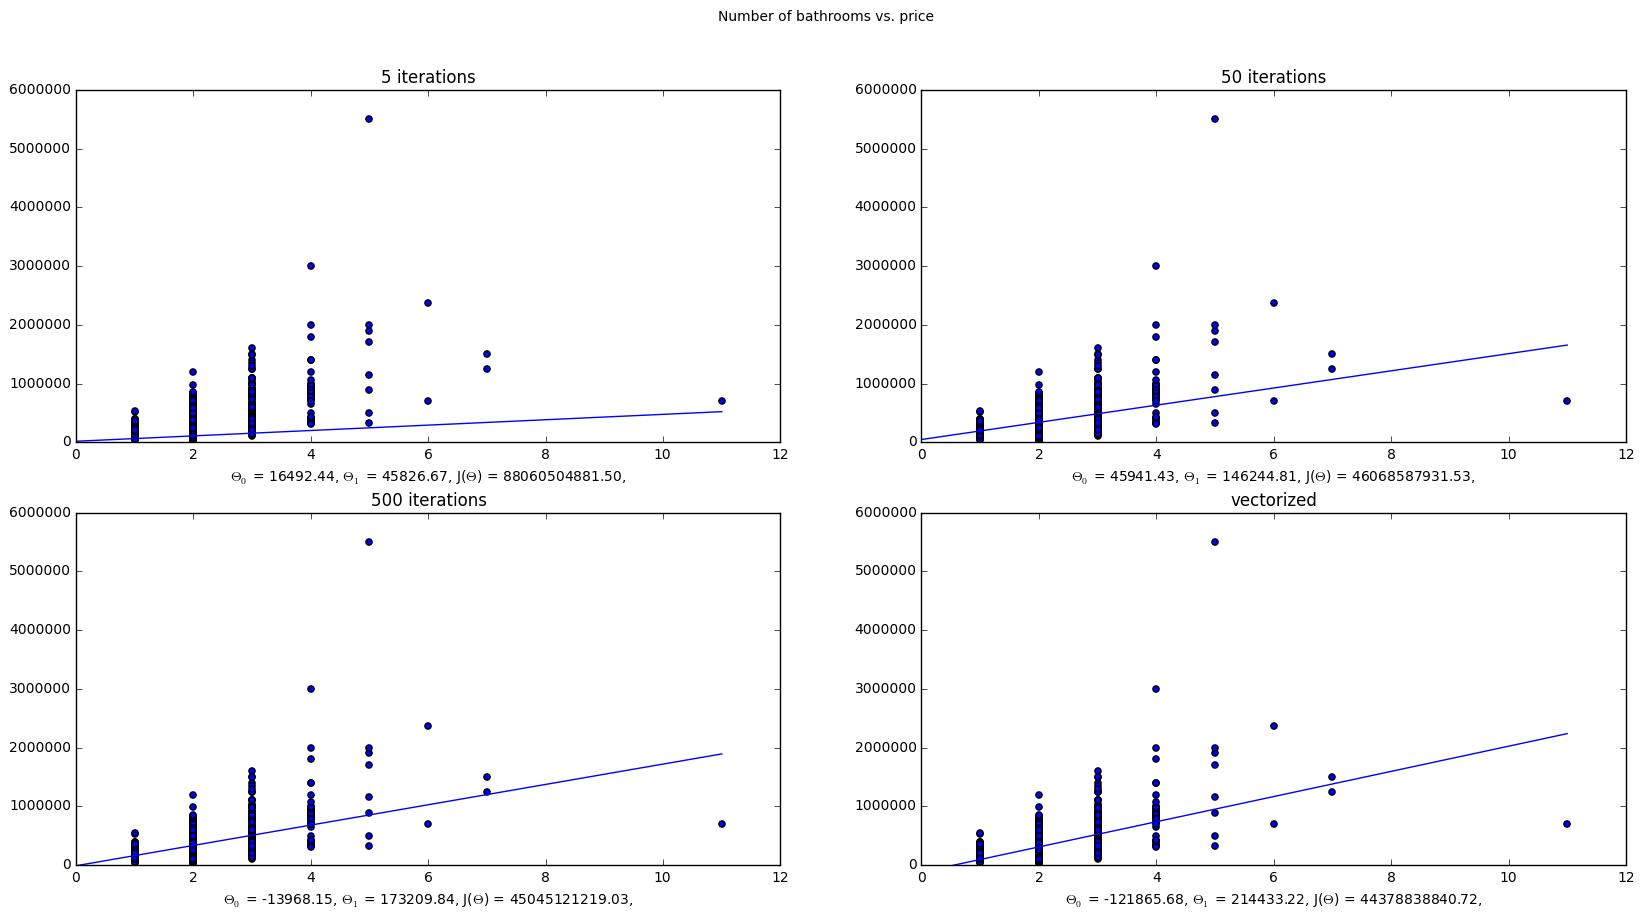

In [44]:
# TODO: choose better values for alpha and number of iterations

iter_1 = regressionIter(0, 1, bathroom, price, 0.01, 5)
iter_2 = regressionIter(0, 1, bathroom, price, 0.01, 50)
iter_3 = regressionIter(0, 1, bathroom, price, 0.01, 500)

vec = regressionVec(bathroom, price)
vec_cost = calcCost(vec[0], vec[1], bathroom, price)

title_1 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_1[0] , iter_1[1], iter_1[2])
title_2 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_2[0] , iter_2[1], iter_2[2])
title_3 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_3[0] , iter_3[1], iter_3[2])
title_4 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (vec[0] , vec[1], vec_cost)

plt.figure(figsize=(20, 10))
plt.suptitle('Number of bathrooms vs. price')

plt.subplot(2,2,1)
plt.scatter(bathroom, price)
plt.title('5 iterations')
plt.axis([0,12,0,6000000])
plt.xlabel(title_1)
x = np.arange(max(bathroom)+1)
y = iter_1[0] + iter_1[1] * x
plt.plot(x,y)

plt.subplot(2,2,2)
plt.scatter(bathroom, price)
plt.title('50 iterations')
plt.axis([0,12,0,6000000])
plt.xlabel(title_2)
x = np.arange(max(bathroom)+1)
y = iter_2[0] + iter_2[1] * x
plt.plot(x,y)

plt.subplot(2,2,3)
plt.scatter(bathroom, price)
plt.title('500 iterations')
plt.axis([0,12,0,6000000])
plt.xlabel(title_3)
x = np.arange(max(bathroom)+1)
y = iter_3[0] + iter_3[1] * x
plt.plot(x,y)

plt.subplot(2,2,4)
plt.scatter(bathroom, price)
plt.title('vectorized')
plt.axis([0,12,0,6000000])
plt.xlabel(title_4)
x = np.arange(max(bathroom)+1)
y = vec[0] + vec[1] * x
plt.plot(x,y)

plt.show()

### 5. Size

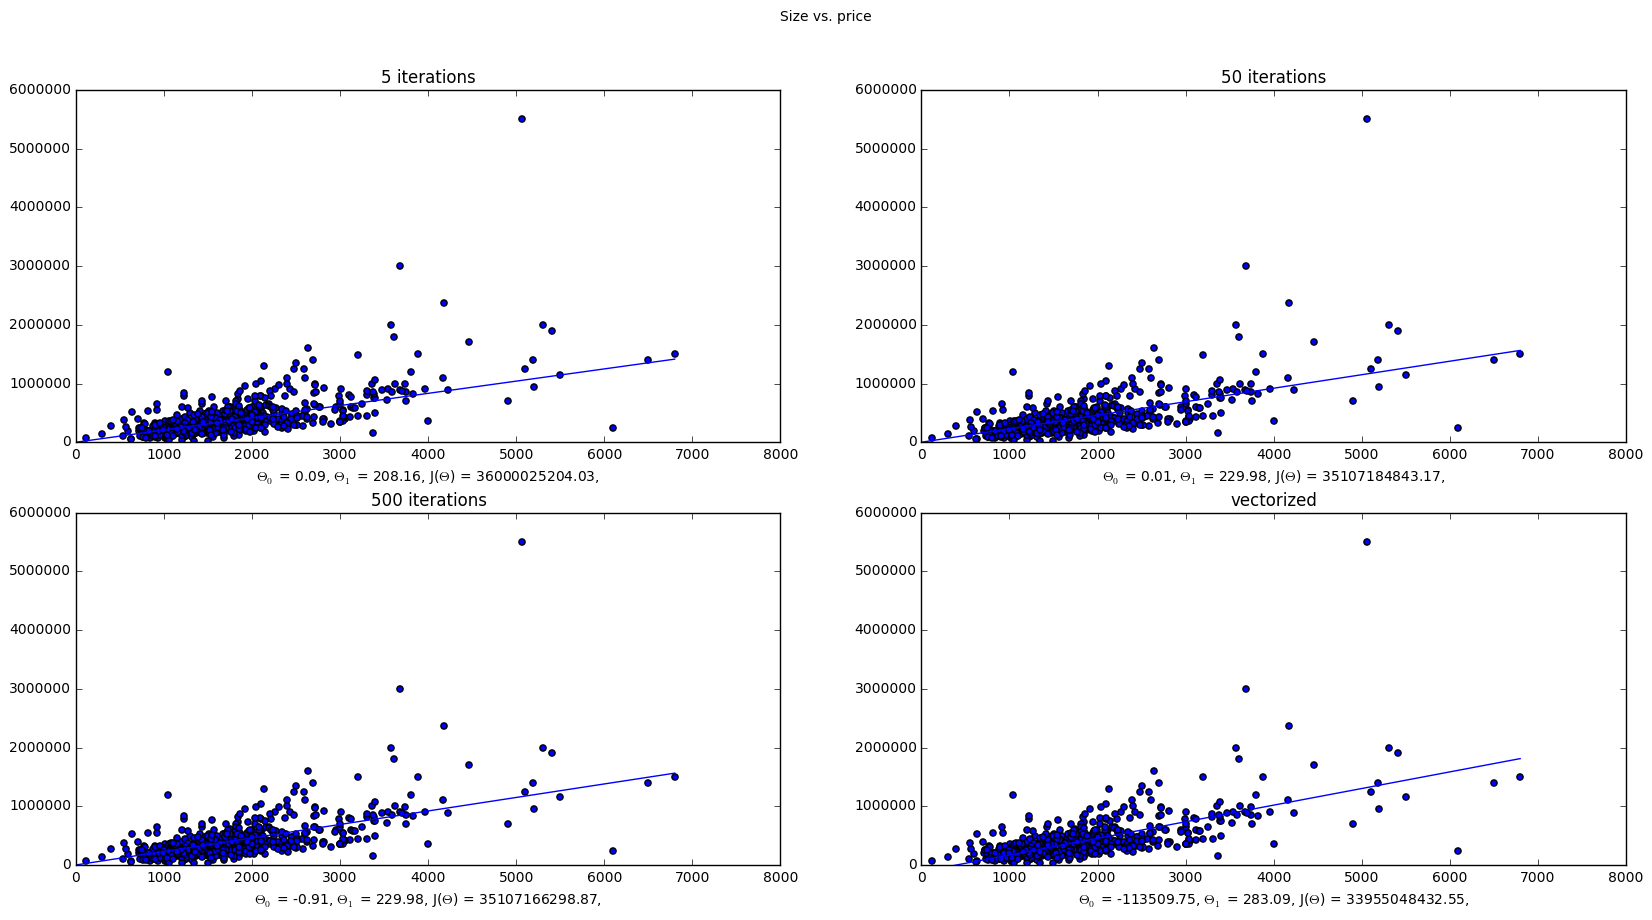

In [45]:
# TODO: choose better values for alpha and number of iterations

iter_1 = regressionIter(0, 1, size, price, 0.0000001, 5)
iter_2 = regressionIter(0, 1, size, price, 0.0000001, 50)
iter_3 = regressionIter(0, 1, size, price, 0.0000001, 500)

vec = regressionVec(size, price)
vec_cost = calcCost(vec[0], vec[1], size, price)

title_1 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_1[0] , iter_1[1], iter_1[2])
title_2 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_2[0] , iter_2[1], iter_2[2])
title_3 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (iter_3[0] , iter_3[1], iter_3[2])
title_4 = '${\Theta_0}$ = %.2f, ${\Theta_1}$ = %.2f, J(${\Theta}$) = %.2f,' % (vec[0] , vec[1], vec_cost)

plt.figure(figsize=(20, 10))
plt.suptitle('Size vs. price')

plt.subplot(2,2,1)
plt.scatter(size, price)
plt.title('5 iterations')
plt.axis([0,8000,0,6000000])
plt.xlabel(title_1)
x = np.arange(max(size))
y = iter_1[0] + iter_1[1] * x
plt.plot(x,y)

plt.subplot(2,2,2)
plt.scatter(size, price)
plt.title('50 iterations')
plt.axis([0,8000,0,6000000])
plt.xlabel(title_2)
x = np.arange(max(size))
y = iter_2[0] + iter_2[1] * x
plt.plot(x,y)

plt.subplot(2,2,3)
plt.scatter(size, price)
plt.title('500 iterations')
plt.axis([0,8000,0,6000000])
plt.xlabel(title_3)
x = np.arange(max(size))
y = iter_3[0] + iter_3[1] * x
plt.plot(x,y)

plt.subplot(2,2,4)
plt.scatter(size, price)
plt.title('vectorized')
plt.axis([0,8000,0,6000000])
plt.xlabel(title_4)
x = np.arange(max(size))
y = vec[0] + vec[1] * x
plt.plot(x,y)

plt.show()